# Unit 7 Data Storytelling

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

%matplotlib inline

In [2]:
master_df = pd.read_csv(r'master_df.csv',encoding='latin-1')
master_df.head()
# master_df.Rate.plot.kde()

,Unnamed: 0,Date,RegionName,Population,Afford_idx,Property_Crimes,Violent_Crimes,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
0,0,2013-01-01,Alameda County,1554138,0.32,1018333,151634,429100.0,8.3,3.41,79.0,2326.0
1,1,2013-02-01,Alameda County,1554138,0.32,1018333,151634,428400.0,7.8,3.53,70.0,2229.0
2,2,2013-03-01,Alameda County,1554138,0.32,1018333,151634,436100.0,7.5,3.57,51.0,2115.0
3,3,2013-04-01,Alameda County,1554138,0.25,1018333,151634,441500.0,7.0,3.45,46.5,2105.0
4,4,2013-05-01,Alameda County,1554138,0.25,1018333,151634,460100.0,7.0,3.54,45.0,2159.0


### 1. Compare sales price trend between 3 counties represending SF bay area, northern CA and Southern CA.

#### 1.1 Compare sales price trend

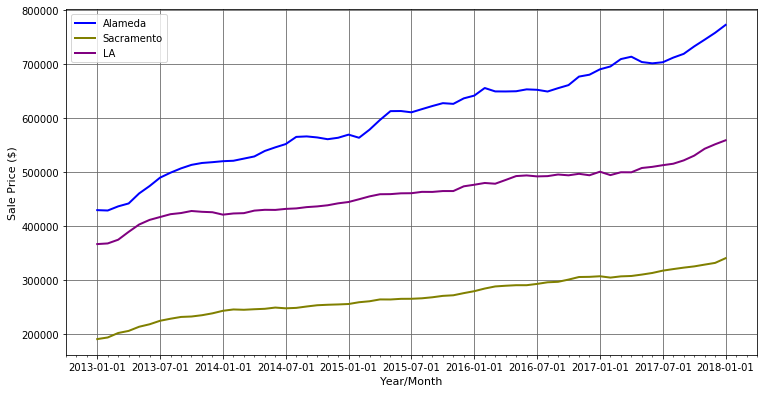

In [3]:
alameda_df= master_df[master_df.RegionName == 'Alameda County']
alameda_df.reset_index(inplace=True)
sacramento_df= master_df[master_df.RegionName == 'Sacramento County']
sacramento_df.reset_index(inplace=True)
la_df= master_df[master_df.RegionName == 'Los Angeles County']
la_df.reset_index(inplace=True)

fig = plt.figure(figsize=(12,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot( 'Date', 'SalePrice', data=alameda_df, marker='', color='blue', linewidth=2)
axes.plot( 'Date', 'SalePrice', data=sacramento_df, marker='', color='olive', linewidth=2)
axes.plot( 'Date', 'SalePrice', data=la_df, marker='', color='purple', linewidth=2,)
axes.legend(['Alameda', 'Sacramento', 'LA'])

plt.xlabel('Year/Month', fontsize=11)
plt.ylabel('Sale Price ($)', fontsize=11)
 
# Note for myself: tick spacing: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/3/ch03lvl1sec48/controlling-tick-spacing    
axes.xaxis.set_major_locator(ticker.MultipleLocator(6))
axes.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show()


#### 1.2. Compare sale price change % trend

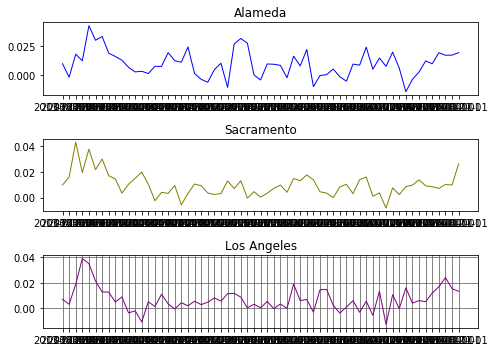

In [4]:
# Calculate the percentage change.

alm_saleprice_change_perc=alameda_df.SalePrice.pct_change()
alm_saleprice_change_perc[0] = alm_saleprice_change_perc.mean()    

sac_saleprice_change_perc=sacramento_df.SalePrice.pct_change()
sac_saleprice_change_perc[0] = sac_saleprice_change_perc.mean() 

la_saleprice_change_perc=la_df.SalePrice.pct_change()
la_saleprice_change_perc[0] = la_saleprice_change_perc.mean()


# plot
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(7,5))  

ax1.plot( alameda_df.Date, alm_saleprice_change_perc, marker='', color='blue', linewidth=1)
ax1.title.set_text('Alameda')


ax2.plot( sacramento_df.Date, sac_saleprice_change_perc, marker='', color='olive', linewidth=1)
ax2.title.set_text('Sacramento')

ax3.plot( la_df.Date, la_saleprice_change_perc, marker='', color='purple', linewidth=1,)
ax3.title.set_text('Los Angeles')


plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.tight_layout()

### 2. Compare sales price with Rate - national

#### 2.1. Rate trend

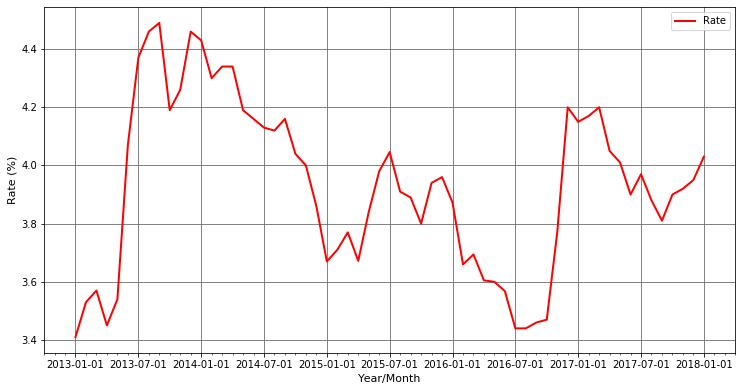

In [5]:
fig = plt.figure(figsize=(12,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8]) 
axes.plot( 'Date', 'Rate', data=alameda_df, marker='', color='red', linewidth=2,)

axes.legend(['Rate'])

plt.xlabel('Year/Month', fontsize=11)
plt.ylabel('Rate (%)', fontsize=11)
 
# Note for myself: tick spacing: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/3/ch03lvl1sec48/controlling-tick-spacing    
axes.xaxis.set_major_locator(ticker.MultipleLocator(6))
axes.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show()

#### 2.2 Correlation between sales price and national mortgage rate

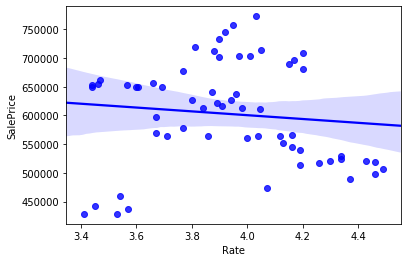

In [6]:
# Alameda
sns.regplot(y=alameda_df.SalePrice, x=alameda_df.Rate,  fit_reg = True, color='blue')

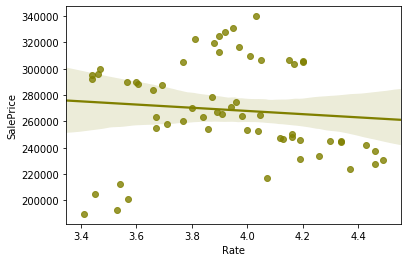

In [7]:
# Sacramento
sns.regplot(y=sacramento_df.SalePrice, x=sacramento_df.Rate,  fit_reg = True, color='olive')

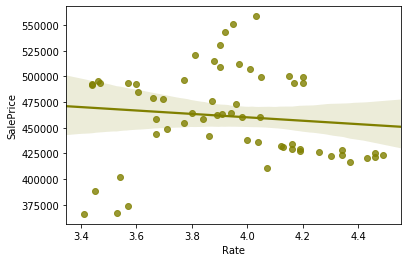

In [8]:
# LA
sns.regplot(y=la_df.SalePrice, x=la_df.Rate,  fit_reg = True, color='olive')

#### 2.3. Rate and Sale price change percentage without lag

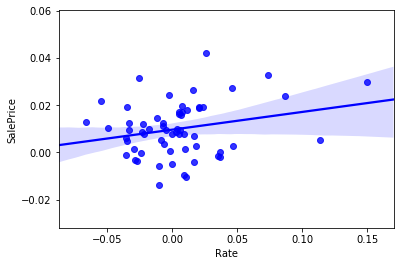

In [9]:
alm_rate_change_perc=alameda_df.Rate.pct_change()
alm_rate_change_perc[0] = alm_rate_change_perc.mean()    

sns.regplot(y=alm_saleprice_change_perc, x=alm_rate_change_perc,  fit_reg = True, color='blue')


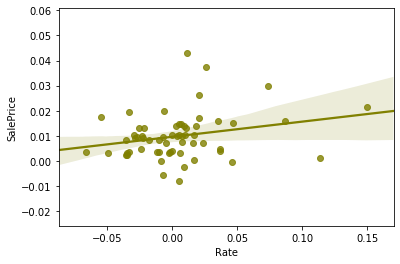

In [10]:
sns.regplot(y=sac_saleprice_change_perc, x=alm_rate_change_perc,  fit_reg = True, color='olive')

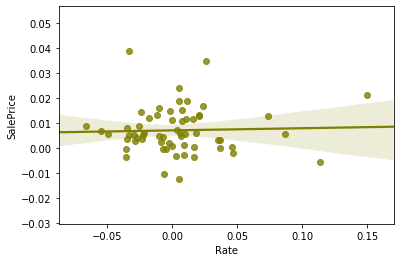

In [11]:
sns.regplot(y=la_saleprice_change_perc, x=alm_rate_change_perc,  fit_reg = True, color='olive')

#### 2.4. Alameda - Lag rate by quarter. 

Usually people lock in rates for 60 days or so before purchasing home so the rate change might not take affect for about quarter. 

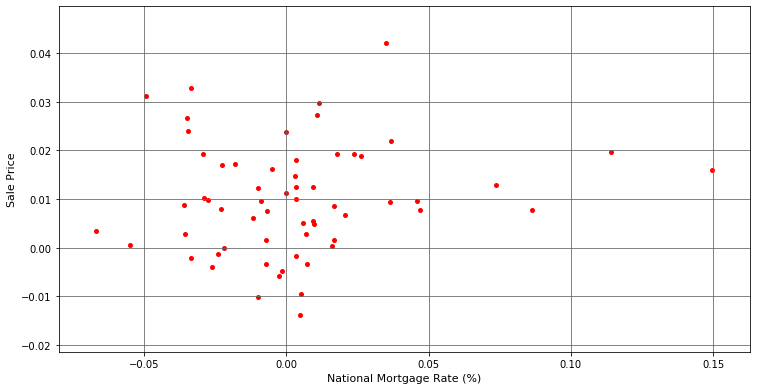

In [12]:
a = pd.Series([alm_rate_change_perc.mean(), alm_rate_change_perc.mean(), alm_rate_change_perc.mean()])
alm_rate_change_perc_delayed = pd.concat([a, alm_rate_change_perc])

alm_rate_change_perc_delayed.drop(alm_rate_change_perc_delayed.tail(3).index,inplace=True) # drop last n rows
 
fig = plt.figure(figsize=(12,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8])  

axes.scatter( alm_rate_change_perc_delayed, alm_saleprice_change_perc,  marker='.', color='red', linewidth=2,)

plt.ylabel('Sale Price', fontsize=11)
plt.xlabel('National Mortgage Rate (%)', fontsize=11)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show()

#### 2.5. Alameda, Sacramento and LA County - Lag by quarter 

In [13]:
# Sacramento
sac_rate_change_perc=sacramento_df.Rate.pct_change()
sac_rate_change_perc[0] = sac_rate_change_perc.mean()    

b = pd.Series([sac_rate_change_perc.mean(), sac_rate_change_perc.mean(), sac_rate_change_perc.mean()])
sac_rate_change_perc_delayed = pd.concat([b, sac_rate_change_perc])
# drop last 3 rows
sac_rate_change_perc_delayed.drop(sac_rate_change_perc_delayed.tail(3).index,inplace=True) 

# LA

la_rate_change_perc=la_df.Rate.pct_change()
la_rate_change_perc[0] = la_rate_change_perc.mean()    

c = pd.Series([la_rate_change_perc.mean(), la_rate_change_perc.mean(), la_rate_change_perc.mean()])
la_rate_change_perc_delayed = pd.concat([c, la_rate_change_perc])
# drop last 3 rows
la_rate_change_perc_delayed.drop(la_rate_change_perc_delayed.tail(3).index,inplace=True) 


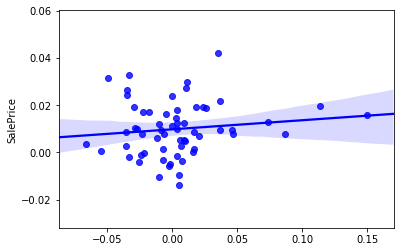

In [14]:
# Alameda
sns.regplot(y=alm_saleprice_change_perc, x=alm_rate_change_perc_delayed,  fit_reg = True, color='blue')

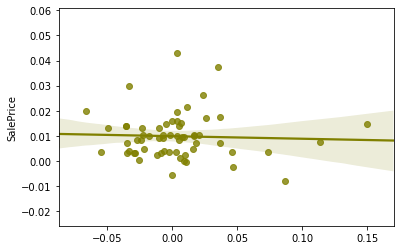

In [15]:
# Sacramento
sns.regplot(y=sac_saleprice_change_perc, x=sac_rate_change_perc_delayed,  fit_reg = True, color='olive')

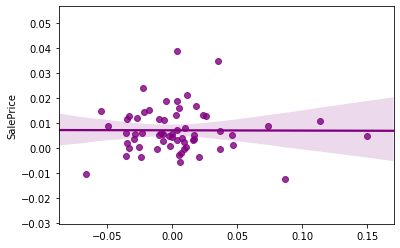

In [16]:
# LA
sns.regplot(y=la_saleprice_change_perc, x=la_rate_change_perc_delayed,  fit_reg = True, color='purple')

### 3. Compare sales price with Unemployment Rate - at county level

#### 3.1. Trend timeline

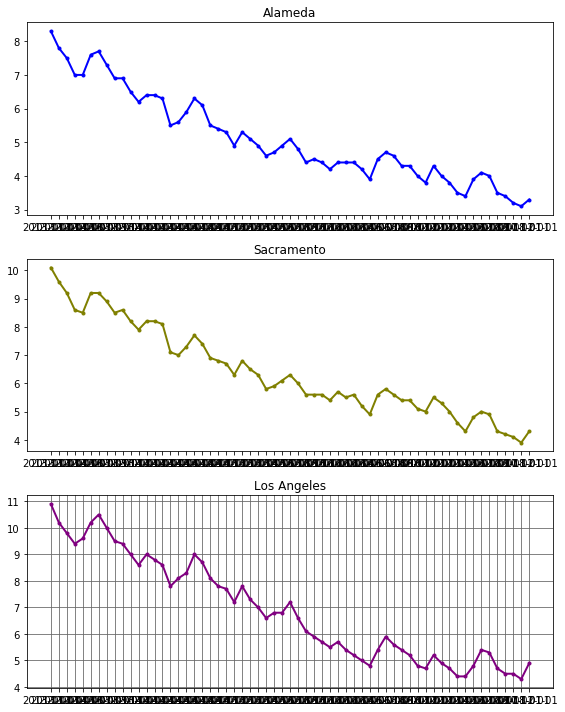

In [17]:
# plot all - alameda, sac, la
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))  

ax1.plot( 'Date', 'UnemployRate', data=alameda_df,  marker='.', color='blue', linewidth=2,)
ax1.title.set_text('Alameda')


ax2.plot( 'Date', 'UnemployRate', data=sacramento_df,   marker='.', color='olive', linewidth=2,)
ax2.title.set_text('Sacramento')

ax3.plot( 'Date', 'UnemployRate', data=la_df,  marker='.', color='purple', linewidth=2,)
ax3.title.set_text('Los Angeles')


plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.tight_layout()

#### 3.2. Correlation between Unemployment Rate and Sales Price

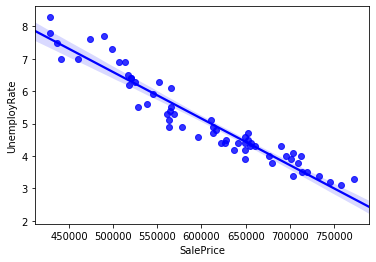

In [18]:
# Alameda
 
sns.regplot(y='UnemployRate', x='SalePrice', data=alameda_df, fit_reg = True, color='blue')

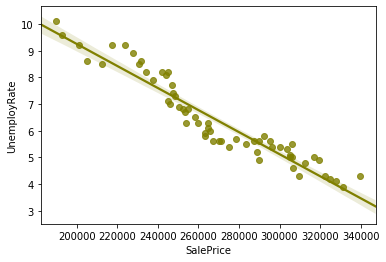

In [19]:
# Sacramento

sns.regplot(y='UnemployRate', x='SalePrice', data=sacramento_df, fit_reg = True, color='olive')

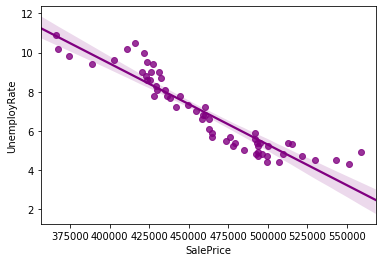

In [20]:
# LA
sns.regplot(y='UnemployRate', x='SalePrice', data=la_df, fit_reg = True, color='purple')

### 4. Number of days property is listed on Zillow

#### 4.1. Trend

There's yearly cycle but overall, there is slight downward trend. Sacramento's downward trend is steeper than LA or Alameda county, possibly because it's housing prices were more reasonable.  

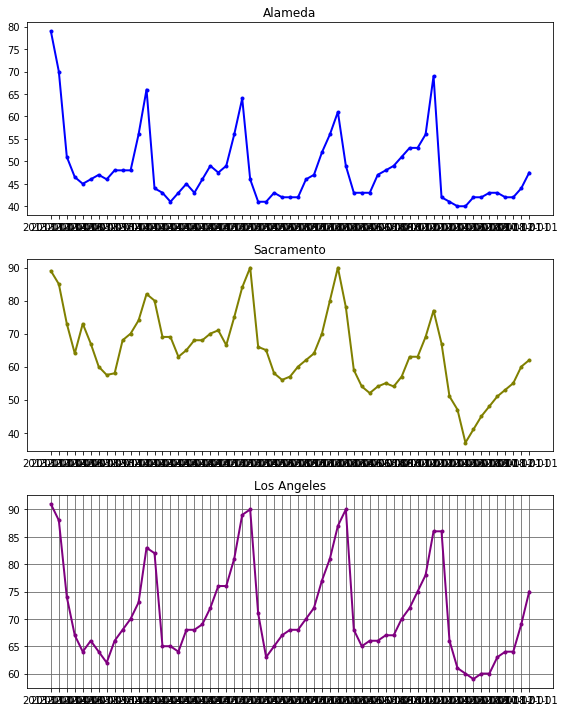

In [21]:
# plot all - alameda, sac, la
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))  

ax1.plot( 'Date', 'Days_On_Zillow',  data=alameda_df,  marker='.', color='blue', linewidth=2,)
ax1.title.set_text('Alameda')


ax2.plot( 'Date', 'Days_On_Zillow', data=sacramento_df,   marker='.', color='olive', linewidth=2,)
ax2.title.set_text('Sacramento')

ax3.plot( 'Date', 'Days_On_Zillow', data=la_df,  marker='.', color='purple', linewidth=2,)
ax3.title.set_text('Los Angeles')


plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.tight_layout()

#### 4.2. Smooth out the cycles

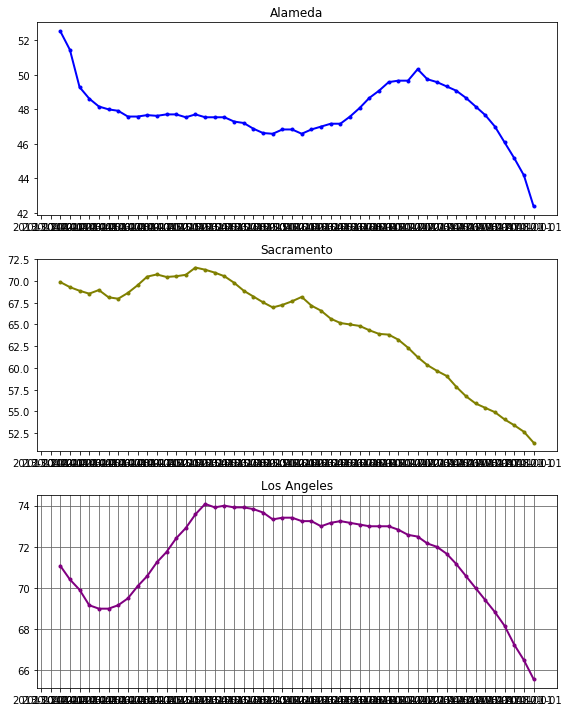

In [22]:
# smooth out the cycles. 
alm_rolling_df = alameda_df.Days_On_Zillow.rolling(12).mean()  
sac_rolling_df = sacramento_df.Days_On_Zillow.rolling(12).mean()  
la_rolling_df = la_df.Days_On_Zillow.rolling(12).mean()  
 
# plot all - alameda, sac, la
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))     
    
ax1.plot(alameda_df.Date, alm_rolling_df, marker='.', color='blue', linewidth=2,)
ax1.title.set_text('Alameda')


ax2.plot(sacramento_df.Date, sac_rolling_df, marker='.', color='olive', linewidth=2,)
ax2.title.set_text('Sacramento')

ax3.plot(la_df.Date, la_rolling_df, marker='.', color='purple', linewidth=2,)
ax3.title.set_text('Los Angeles')


plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.tight_layout()    

#### 4.3. Alameda - correlation between Sale Price and Rolling # of days on Zillow

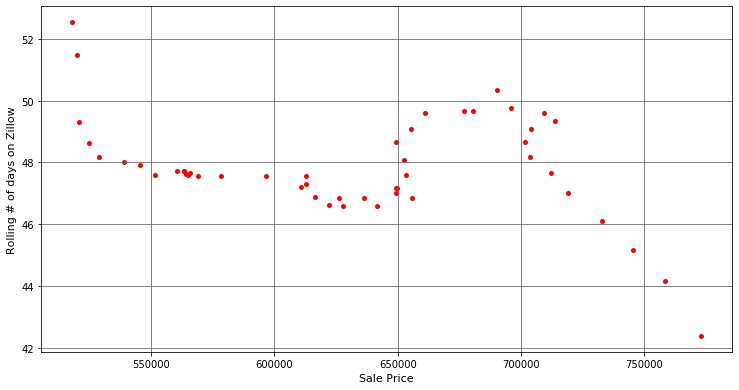

In [23]:
fig = plt.figure(figsize=(12,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8]) 
axes.scatter( alameda_df.SalePrice, alm_rolling_df, marker='.', color='red', linewidth=2,)

plt.xlabel('Sale Price', fontsize=11)
plt.ylabel('Rolling # of days on Zillow', fontsize=11)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show()

#### 4.4. Alameda County - coorelation ( linear regression fit ) between percentage change between Sales price and percentage change of rolling # of days on Zillow

In [24]:
# Alameda

sns.regplot(y=alm_rolling_days_change_perc, x=alm_saleprice_change_perc, fit_reg = True, color='blue')

NameError: name 'alm_rolling_days_change_perc' is not defined

In [ ]:
# Sacramento

sns.regplot(y=sac_rolling_days_change_perc, x=sac_saleprice_change_perc, fit_reg = True, color='olive')

In [ ]:
# LA

sns.regplot(y=la_rolling_days_change_perc, x=la_saleprice_change_perc, fit_reg = True, color='purple')

### 5. Monthly number of Listings on Zillow

#### 5.1. Trend

As prices climb, number of listings go down in Alameda and LA counties but Sacramento seems to increase in listing, possibly because the prices are still affordable and existing home owners see this as chance to sell. 

In [ ]:
# plot all - alameda, sac, la
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))  

ax1.plot( 'Date', 'Monthly_List_Zillow',  data=alameda_df,  marker='', color='blue', linewidth=2,)
ax1.title.set_text('Alameda')


ax2.plot( 'Date', 'Monthly_List_Zillow', data=sacramento_df,   marker='', color='olive', linewidth=2,)
ax2.title.set_text('Sacramento')

ax3.plot( 'Date', 'Monthly_List_Zillow', data=la_df,  marker='', color='purple', linewidth=2,)
ax3.title.set_text('Los Angeles')


plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.tight_layout()

##### 5.1.1. Smooth out the cycles

In [ ]:
# smooth out the cycles. 
alm_rolling_list_df = alameda_df.Monthly_List_Zillow.rolling(6).mean()  
sac_rolling_list_df = sacramento_df.Monthly_List_Zillow.rolling(6).mean()  
la_rolling_list_df = la_df.Monthly_List_Zillow.rolling(6).mean()  


# plot all - alameda, sac, la
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))  

ax1.plot( alameda_df.Date, alm_rolling_list_df, marker='', color='blue', linewidth=2,)
ax1.title.set_text('Alameda')


ax2.plot( sacramento_df.Date, sac_rolling_list_df, marker='', color='olive', linewidth=2,)
ax2.title.set_text('Sacramento')

ax3.plot( la_df.Date, la_rolling_list_df, marker='', color='purple', linewidth=2,)
ax3.title.set_text('Los Angeles')


plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.tight_layout()

#### 5.2. Correlation between sales price and monthly listing (rolling 6 month average)

In [ ]:
# plot all - alameda, sac, la
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,10))  

#ax1.scatter(alm_saleprice_change_perc, alm_list_change_perc, marker='.', color='red', linewidth=2)
ax1.scatter(alameda_df.SalePrice, alm_rolling_list_df, marker='.', color='blue', linewidth=2)
ax1.title.set_text('Alameda')


ax2.scatter(alameda_df.SalePrice, sac_rolling_list_df, marker='.', color='olive', linewidth=2)
ax2.title.set_text('Sacramento')

ax3.scatter(alameda_df.SalePrice, la_rolling_list_df, marker='.', color='purple', linewidth=2)
ax3.title.set_text('Los Angeles')


plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.tight_layout()

#### 5.3. Correlation between Sales price percentage change and month listing percentage change

In [ ]:
# correlation between Sales price and month listing. 

alm_list_change_perc = alameda_df.Monthly_List_Zillow.pct_change()
alm_list_change_perc[0] = alm_list_change_perc.mean() 

sac_list_change_perc = sacramento_df.Monthly_List_Zillow.pct_change()
sac_list_change_perc[0] = sac_list_change_perc.mean() 

la_list_change_perc = la_df.Monthly_List_Zillow.pct_change()
la_list_change_perc[0] = la_list_change_perc.mean() 


In [ ]:
# Alameda 
sns.regplot(y=alm_list_change_perc, x=alm_saleprice_change_perc,  fit_reg = True, color='blue')

In [ ]:
# Sacramento 
sns.regplot(y=sac_list_change_perc, x=sac_saleprice_change_perc,  fit_reg = True, color='olive')

In [ ]:
# LA 
sns.regplot(y=la_list_change_perc, x=la_saleprice_change_perc,  fit_reg = True, color='purple')

### 6. Afford_idx - Quarterly by County
Housing Affordability Index = ( Median Family Income / Qualifying Income ) * 100

#### 6.1. Prepare Quarterly average Sales Price
#### 6.2. Graph trend

In [ ]:
# set DateTime index
alameda_df['Date'] = pd.to_datetime(alameda_df['Date']) 
alameda_by_date = alameda_df.set_index('Date')

sacramento_df['Date'] = pd.to_datetime(sacramento_df['Date']) 
sacramento_by_date = sacramento_df.set_index('Date')

la_df['Date'] = pd.to_datetime(la_df['Date']) 
la_by_date = la_df.set_index('Date')


In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Afford_idx', 'SalePrice']

# Get average sales price for each quarter - Alameda
alameda_quarterly = alameda_by_date[data_columns].resample('Q').mean()

# Get average sales price for each quarter - Sacramento
sacramento_quarterly = sacramento_by_date[data_columns].resample('Q').mean()

# Get average sales price for each quarter - LA
la_quarterly = la_by_date[data_columns].resample('Q').mean()
la_quarterly.head()


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(7,5))  

ax1.plot( alameda_quarterly.index, alameda_quarterly.Afford_idx, marker='', color='blue')
ax1.title.set_text('Alameda')

ax2.plot( sacramento_quarterly.index, sacramento_quarterly.Afford_idx, marker='', color='olive')
ax2.title.set_text('Sacramento')

ax3.plot( la_quarterly.index, la_quarterly.Afford_idx, marker='', color='purple')
ax3.title.set_text('Los Angeles')

plt.tight_layout()

#### 6.3. Sales Price trend against quarterly affordability index

In [ ]:
# Alameda
sns.regplot(y=alameda_quarterly.Afford_idx, x=alameda_quarterly.SalePrice,  fit_reg = True, color='blue')

In [ ]:
# Sacramento
sns.regplot(y=sacramento_quarterly.Afford_idx, x=sacramento_quarterly.SalePrice,  fit_reg = True, color='olive')

In [ ]:
# LA
sns.regplot(y=la_quarterly.Afford_idx, x=la_quarterly.SalePrice,  fit_reg = True, color='blue')

### Prepare Annual data

In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Population','Property_Crimes','Violent_Crimes', 'SalePrice']

# Get average for each year - Alameda
# Resample to weekly frequency, aggregating with mean
alameda_yearly = alameda_by_date[data_columns].resample('Y').mean()

# Get average sales price for each year - Sacramento
sacramento_yearly = sacramento_by_date[data_columns].resample('Y').mean()

# Get average sales price for each year - LA

la_yearly = la_by_date[data_columns].resample('Y').mean()
la_yearly.head(20)

### 7. Population - annual by county

#### 7.1. Trend

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))  


ax1.plot( alameda_yearly.index, alameda_yearly.Population, marker='', color='blue')
ax1.title.set_text('Alameda')

ax2.plot( sacramento_yearly.index, sacramento_yearly.Population, marker='', color='olive')
ax2.title.set_text('Sacramento')

ax3.plot( la_yearly.index, la_yearly.Population, marker='', color='purple')
ax3.title.set_text('Los Angeles')

plt.xlabel('Date', fontsize=11)
plt.ylabel('Annual Population', fontsize=11)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
 

plt.tight_layout()

#### 7.2. Correlation between sales price and population 

In [ ]:
# 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))  


ax1.plot( alameda_yearly.SalePrice, alameda_yearly.Population, marker='.', color='blue', linewidth=2)
ax1.title.set_text('Alameda')

ax2.plot( sacramento_yearly.SalePrice, sacramento_yearly.Population, marker='.', color='olive', linewidth=2)
ax2.title.set_text('Sacramento')

ax3.plot( la_yearly.SalePrice, la_yearly.Population, marker='.', color='purple', linewidth=2)
ax3.title.set_text('Los Angeles')

plt.xlabel('Sale Price', fontsize=11)
plt.ylabel('Annual Population', fontsize=11)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
 
plt.tight_layout()


### 8. Property_Crimes - Annual - State level

#### 8.1. Trend


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))  


ax1.plot( alameda_yearly.index, alameda_yearly.Property_Crimes, marker='.', color='blue', linewidth=2)
ax1.title.set_text('Alameda')

ax2.plot( sacramento_yearly.index, sacramento_yearly.Property_Crimes, marker='.', color='olive', linewidth=2)
ax2.title.set_text('Sacramento')

ax3.plot( la_yearly.index, la_yearly.Property_Crimes, marker='.', color='purple', linewidth=2)
ax3.title.set_text('Los Angeles')

plt.xlabel('Date', fontsize=11)
plt.ylabel('Annual Property Crime', fontsize=11)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
 
plt.tight_layout()


#### 8.2. Correlation between sales price and property crimes

In [ ]:
# 
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))  


ax1.plot( alameda_yearly.SalePrice, alameda_yearly.Property_Crimes, marker='.', color='blue', linewidth=2)
ax1.title.set_text('Alameda')

ax2.plot( sacramento_yearly.SalePrice, sacramento_yearly.Property_Crimes, marker='.', color='olive', linewidth=2)
ax2.title.set_text('Sacramento')

ax3.plot( la_yearly.SalePrice, la_yearly.Property_Crimes, marker='.', color='purple', linewidth=2)
ax3.title.set_text('Los Angeles')

plt.xlabel('Sale Price', fontsize=11)
plt.ylabel('Annual Property Crime', fontsize=11)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
 
plt.tight_layout()

### 9. Violent_Crimes  - Annual - State level

#### 9.1. Trend

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))  

ax1.plot( alameda_yearly.index, alameda_yearly.Violent_Crimes, marker='.', color='red', linewidth=2)
ax1.title.set_text('Alameda')

ax2.plot( sacramento_yearly.index, sacramento_yearly.Violent_Crimes, marker='.', color='blue', linewidth=2)
ax2.title.set_text('Sacramento')

ax3.plot( la_yearly.index, la_yearly.Violent_Crimes, marker='.', color='olive', linewidth=2)
ax3.title.set_text('Los Angeles')

plt.xlabel('Date', fontsize=11)
plt.ylabel('Annual Violent Crime', fontsize=11)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
 
plt.tight_layout()

#### 9.2. Correlation between sales price and violent crimes.

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,10))  

ax1.plot( alameda_yearly.SalePrice, alameda_yearly.Violent_Crimes, marker='.', color='red', linewidth=2)
ax1.title.set_text('Alameda')

ax2.plot( sacramento_yearly.SalePrice, sacramento_yearly.Violent_Crimes, marker='.', color='blue', linewidth=2)
ax2.title.set_text('Sacramento')

ax3.plot( la_yearly.SalePrice, la_yearly.Violent_Crimes, marker='.', color='olive', linewidth=2)
ax3.title.set_text('Los Angeles')

plt.xlabel('Sale Price', fontsize=11)
plt.ylabel('Annual Violent Crime', fontsize=11)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
 
plt.tight_layout()